# Paper: 
**Title**:  
   - Graph Attention Networks  

**Authors**:  
   - Petar Velickovic et al
    
**Published at**:  
   - ICLR 2018  
   
**Highlights**:  
   - Readily applicable in inductive and transductive settings
   - Division between spectral approaches (eigendecomposition of graph laplacian) and non-spectral approaches
       - Spectral methods $\rightarrow$ depends on laplacian eigenbasis $\rightarrow$ known graph structure
   - Benefit of using attention:
       - Variable size input
       - Compute hidden representations of each node, but attention over their neighbors (_**self attention**_)
   - Input $\rightarrow$ Node Features $ h = \{\overrightarrow{h_{1}}, \overrightarrow{h_{2}}, ..., \overrightarrow{h_{n}} \}, h_{i}$ 
   - Model allows every node attend to its neighbor, dropping all structural information
   - Inject structure by masked attention
   
$$
\alpha_{i,j} = \frac{\exp({LeakyRelu(\overrightarrow{a^T [W h_i || W h_j]}}))}{\sum_{k\in N_{i}}\exp({LeakyRelu(\overrightarrow{a^T [W h_i || W h_k]}}))}
$$

   
$$
\overrightarrow{h'_i} = \sigma(\sum_{j\in N_{i}}\alpha_{i,j}W \overrightarrow{h_j})
$$
       

<img src="GCN_vs_GAT.jpeg" width="640">

In [10]:
!ls

1.label_propagation.ipynb        requirements.txt
2.embeddings_benchmark_GEM.ipynb sbm.gpickle
3.graph_jazz_embeddings.ipynb    sbm_node_labels.pickle
4.spectral_clustering.ipynb      water_drop.gif
5.gcn_message_passing.ipynb      water_drop.mp4
6.gcn_paper.ipynb                water_drop_2.mp4
7.gat_paper_experiments.ipynb    water_drop_3.mp4
GCN_vs_GAT.jpeg                  water_drop_4.mp4
karate.edgelist


### Experiments

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib.pyplot import imshow

## Self Attention

In [2]:
in_features = 5
out_features = 2
nb_nodes = 10

W = nn.Parameter(torch.zeros(size=(in_features, out_features))) #xavier paramiter inizializator
nn.init.xavier_uniform_(W.data, gain=1.414)

x = torch.rand(nb_nodes,in_features) 
h = torch.mm(x, W)
N = h.size()[0]

print(h.shape, N)

torch.Size([10, 2]) 10


In [18]:
α = nn.Parameter(torch.zeros(size=(2*out_features, 1))) 
nn.init.xavier_uniform_(α.data, gain=1.414)
print(α.shape)

leakyrelu = nn.LeakyReLU(0.2)  # LeakyReLU

torch.Size([4, 1])


In [19]:
a_input = torch.cat([h.repeat(1, N).view(N * N, -1), h.repeat(N, 1)], dim=1).view(N, -1, 2 * out_features)
a_input

tensor([[[ 0.0294,  0.1760,  0.0294,  0.1760],
         [ 0.0294,  0.1760, -1.3731,  0.0782],
         [ 0.0294,  0.1760, -0.1718,  0.1770],
         [ 0.0294,  0.1760, -1.2101,  1.0527],
         [ 0.0294,  0.1760, -0.8503, -0.1972],
         [ 0.0294,  0.1760, -0.5405,  0.0592],
         [ 0.0294,  0.1760, -0.8650,  0.1249],
         [ 0.0294,  0.1760, -0.5202,  0.7897],
         [ 0.0294,  0.1760, -0.1016, -0.0373],
         [ 0.0294,  0.1760, -0.1864, -0.5183]],

        [[-1.3731,  0.0782,  0.0294,  0.1760],
         [-1.3731,  0.0782, -1.3731,  0.0782],
         [-1.3731,  0.0782, -0.1718,  0.1770],
         [-1.3731,  0.0782, -1.2101,  1.0527],
         [-1.3731,  0.0782, -0.8503, -0.1972],
         [-1.3731,  0.0782, -0.5405,  0.0592],
         [-1.3731,  0.0782, -0.8650,  0.1249],
         [-1.3731,  0.0782, -0.5202,  0.7897],
         [-1.3731,  0.0782, -0.1016, -0.0373],
         [-1.3731,  0.0782, -0.1864, -0.5183]],

        [[-0.1718,  0.1770,  0.0294,  0.1760],
         

In [20]:
e = leakyrelu(torch.matmul(a_input, α).squeeze(2))
e

tensor([[ 0.0987, -0.0355,  0.0499, -0.1462,  0.1152,  0.0334, -0.0168, -0.0812,
          0.1970,  0.4693],
        [ 0.9173,  0.6413,  0.8686,  0.0876,  0.9338,  0.8520,  0.7344,  0.4126,
          1.0157,  1.2879],
        [ 0.2347, -0.0082,  0.1860, -0.1190,  0.2513,  0.1695,  0.0519, -0.0540,
          0.3331,  0.6054],
        [ 2.0172,  1.7412,  1.9685,  1.1875,  2.0337,  1.9519,  1.8343,  1.5125,
          2.1156,  2.3878],
        [ 0.2252, -0.0102,  0.1765, -0.1209,  0.2418,  0.1599,  0.0423, -0.0559,
          0.3236,  0.5959],
        [ 0.3357,  0.0597,  0.2870, -0.0988,  0.3523,  0.2704,  0.1528, -0.0338,
          0.4341,  0.7063],
        [ 0.6348,  0.3588,  0.5860, -0.0390,  0.6513,  0.5695,  0.4519,  0.1301,
          0.7331,  1.0054],
        [ 1.2284,  0.9524,  1.1797,  0.3987,  1.2449,  1.1631,  1.0455,  0.7237,
          1.3268,  1.5990],
        [-0.0156, -0.0708, -0.0254, -0.1816, -0.0123, -0.0287, -0.0522, -0.1166,
          0.0202,  0.2925],
        [-0.1236, -

In [25]:
# Masked Attention
adj = torch.randint(2, (nb_nodes, nb_nodes))
attention = torch.where(adj > 0, e, torch.zeros_like(e))
attention

tensor([[ 0.0000,  0.0000,  0.0499, -0.1462,  0.1152,  0.0000, -0.0168, -0.0812,
          0.1970,  0.0000],
        [ 0.0000,  0.6413,  0.0000,  0.0876,  0.9338,  0.0000,  0.7344,  0.4126,
          1.0157,  0.0000],
        [ 0.2347, -0.0082,  0.0000,  0.0000,  0.2513,  0.1695,  0.0000,  0.0000,
          0.3331,  0.0000],
        [ 2.0172,  1.7412,  1.9685,  1.1875,  0.0000,  1.9519,  0.0000,  1.5125,
          2.1156,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.2418,  0.0000,  0.0423,  0.0000,
          0.3236,  0.0000],
        [ 0.3357,  0.0597,  0.2870, -0.0988,  0.3523,  0.2704,  0.0000, -0.0338,
          0.4341,  0.7063],
        [ 0.6348,  0.0000,  0.0000, -0.0390,  0.6513,  0.5695,  0.0000,  0.1301,
          0.0000,  1.0054],
        [ 0.0000,  0.0000,  0.0000,  0.3987,  1.2449,  1.1631,  1.0455,  0.7237,
          1.3268,  1.5990],
        [ 0.0000,  0.0000, -0.0254, -0.1816, -0.0123, -0.0287, -0.0522, -0.1166,
          0.0202,  0.2925],
        [-0.1236, -

In [22]:
attention = F.softmax(attention, dim=1)
h_prime  = torch.matmul(attention, h)
print(attention.shape)
attention

torch.Size([10, 10])


tensor([[0.1001, 0.0966, 0.1001, 0.0865, 0.1001, 0.1035, 0.0985, 0.0923, 0.1219,
         0.1001],
        [0.0632, 0.0632, 0.0632, 0.0690, 0.1608, 0.1481, 0.1317, 0.0632, 0.1745,
         0.0632],
        [0.0964, 0.0964, 0.1161, 0.0855, 0.1239, 0.0964, 0.1015, 0.0913, 0.0964,
         0.0964],
        [0.0224, 0.0224, 0.1604, 0.0224, 0.0224, 0.1577, 0.1402, 0.0224, 0.1858,
         0.2439],
        [0.1186, 0.0947, 0.0947, 0.0839, 0.0947, 0.0947, 0.0988, 0.0947, 0.1308,
         0.0947],
        [0.0885, 0.0939, 0.0885, 0.0801, 0.0885, 0.1159, 0.0885, 0.0885, 0.0885,
         0.1793],
        [0.1446, 0.1097, 0.0766, 0.0766, 0.0766, 0.0766, 0.0766, 0.0766, 0.0766,
         0.2094],
        [0.0408, 0.1056, 0.0408, 0.0607, 0.1415, 0.1304, 0.0408, 0.0841, 0.1536,
         0.2017],
        [0.1000, 0.1000, 0.0975, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1021,
         0.1000],
        [0.1051, 0.1051, 0.1051, 0.1051, 0.0932, 0.0917, 0.0896, 0.1051, 0.0947,
         0.1051]], grad_fn=<

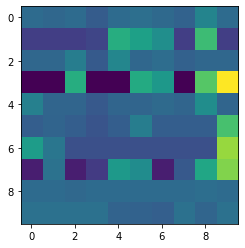

In [23]:
imshow(attention.detach().numpy())

In [ ]:
class GATLayer(nn.Module):
    def __init__(self, in_features, out_features, dropout, alpha, concat=True):
        super(GATLayer, self).__init__()
        self.dropout       = dropout        # drop prob = 0.6
        self.in_features   = in_features    # 
        self.out_features  = out_features   # 
        self.alpha         = alpha          # LeakyReLU with negative input slope, alpha = 0.2
        self.concat        = concat         # conacat = True for all layers except the output layer.

        
        # Xavier Initialization of Weights
        # Alternatively use weights_init to apply weights of choice 
        self.W = nn.Parameter(torch.zeros(size=(in_features, out_features)))
        nn.init.xavier_uniform_(self.W.data, gain=1.414)
        
        self.a = nn.Parameter(torch.zeros(size=(2*out_features, 1)))
        nn.init.xavier_uniform_(self.a.data, gain=1.414)
        
        # LeakyReLU
        self.leakyrelu = nn.LeakyReLU(self.alpha)

    def forward(self, input, adj):
        # Linear Transformation
        h = torch.mm(input, self.W) # matrix multiplication
        N = h.size()[0]
        print(N)

        # Attention Mechanism
        a_input = torch.cat([h.repeat(1, N).view(N * N, -1), h.repeat(N, 1)], dim=1).view(N, -1, 2 * self.out_features)
        e       = self.leakyrelu(torch.matmul(a_input, self.a).squeeze(2))

        # Masked Attention
        zero_vec  = -9e15*torch.ones_like(e)
        attention = torch.where(adj > 0, e, zero_vec)
        
        attention = F.softmax(attention, dim=1)
        attention = F.dropout(attention, self.dropout, training=self.training)
        h_prime   = torch.matmul(attention, h)

        if self.concat:
            return F.elu(h_prime)
        else:
            return h_prime

In [ ]:
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T

import matplotlib.pyplot as plt

name_data = 'Cora'
dataset = Planetoid(root= '/tmp/' + name_data, name = name_data)
dataset.transform = T.NormalizeFeatures()

print(f"Number of Classes in {name_data}:", dataset.num_classes)
print(f"Number of Node Features in {name_data}:", dataset.num_node_features)

In [ ]:
dataset[0]

In [ ]:
class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        self.hid = 8
        self.in_head = 8
        self.out_head = 1
        
        
        self.conv1 = GATConv(dataset.num_features, self.hid, heads=self.in_head, dropout=0.6)
        self.conv2 = GATConv(self.hid*self.in_head, dataset.num_classes, concat=False,
                             heads=self.out_head, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
                
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        
        return F.log_softmax(x, dim=1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [ ]:
model = GAT().to(device)
data = dataset[0].to(device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

In [ ]:
model.train()
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    
    if epoch%200 == 0:
        print(loss)
    
    loss.backward()
    optimizer.step()

In [ ]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

In [ ]:
data.x.shape

In [ ]:
data.edge_index.shape

In [ ]:
data.x.sum(axis=0)

In [ ]:
data.x.sum(axis=1).shape

## Sources

1. [Understanding Graph Attention Networks (GAT)](https://dsgiitr.com/blogs/gat/)
2. [GAT Implementation in PyTorch Geometric](https://github.com/AntonioLonga/PytorchGeometricTutorial/blob/main/Tutorial3/Tutorial3.ipynb)  
3. [PyTorch Geometric tutorial](https://antoniolonga.github.io/Pytorch_geometric_tutorials/index.html)